In [1]:
import numpy as np
import pandas as pd

In [3]:
sucide_rates = pd.read_csv('master.csv')

In [4]:
sucide_rates.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
sucide_rates.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
sucide_rates.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [8]:
del sucide_rates['country-year']
del sucide_rates['HDI for year']

In [9]:
sucide_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [46]:
years = list(sucide_rates['year'].unique())
sucide_year_ratio = []

In [47]:
for year in years:
    year_rates = sucide_rates[sucide_rates['year'] == year]
    sucide_year_avg = sum(year_rates['suicides/100k pop']) / len(year_rates)
    sucide_year_ratio.append(sucide_year_avg)

data = pd.DataFrame({'years': years, 'sucide_year_ratio': sucide_year_ratio})

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

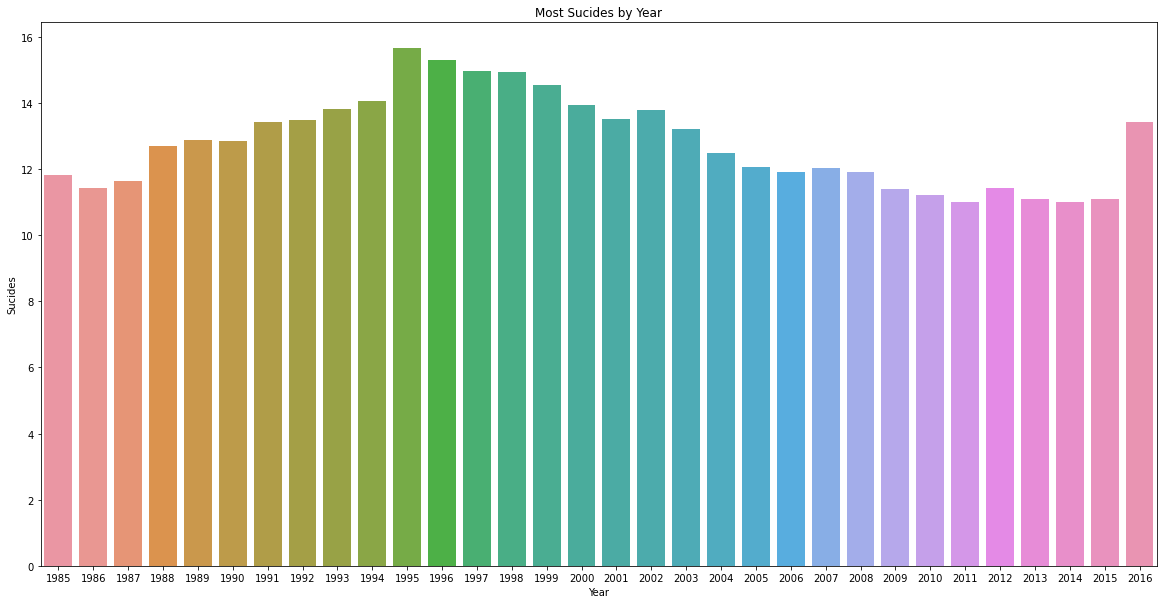

In [53]:
plt.figure(figsize = (20, 10))
sns.barplot(x = data['years'], y = data['sucide_year_ratio'])
# plt.xticks(rotation = 90)
plt.ylabel('Sucides')
plt.xlabel('Year')
plt.title('Most Sucides by Year')
plt.show()

In [57]:
countries = list(sucide_rates['country'].unique())
sucide_country_ratio = []

In [58]:
for country in countries:
    country_rate = sucide_rates[sucide_rates['country'] == country]
    country_sucide_rate = sum(country_rate['suicides/100k pop']) / len(country_rate)
    sucide_country_ratio.append(country_sucide_rate)

data_2 = pd.DataFrame({'countries': countries, 'sucide_country_ratio': sucide_country_ratio})

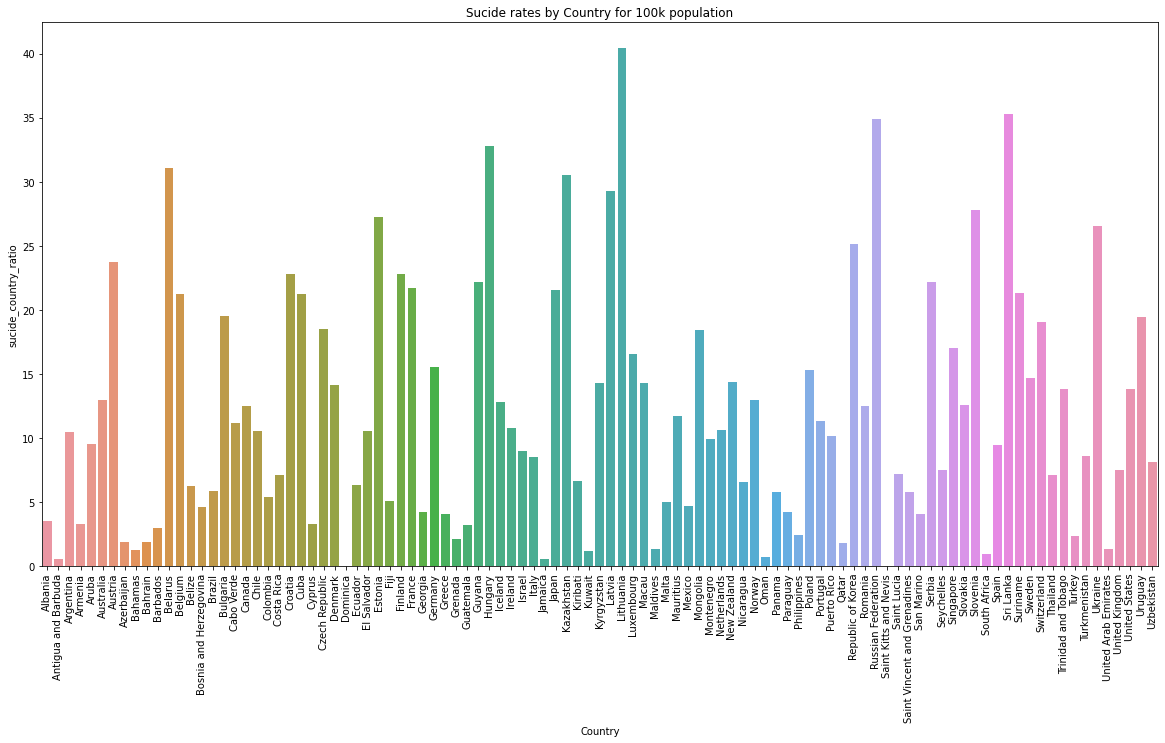

In [60]:
plt.figure(figsize = (20, 10))
sns.barplot(x = data_2['countries'], y = data_2['sucide_country_ratio'])
plt.xlabel('Country')
plt.ylabel('sucide_country_ratio')
plt.title('Sucide rates by Country for 100k population')
plt.xticks(rotation = 90)
plt.show()

In [63]:
gen_rates = sucide_rates[['generation','suicides/100k pop']].groupby(['generation']).mean()
gen_rates.sort_values(by = 'suicides/100k pop', ascending = False)

,suicides/100k pop
generation,
G.I. Generation,23.946378
Silent,18.418848
Boomers,14.742094
Generation X,10.556874
Millenials,5.383597
Generation Z,0.642299


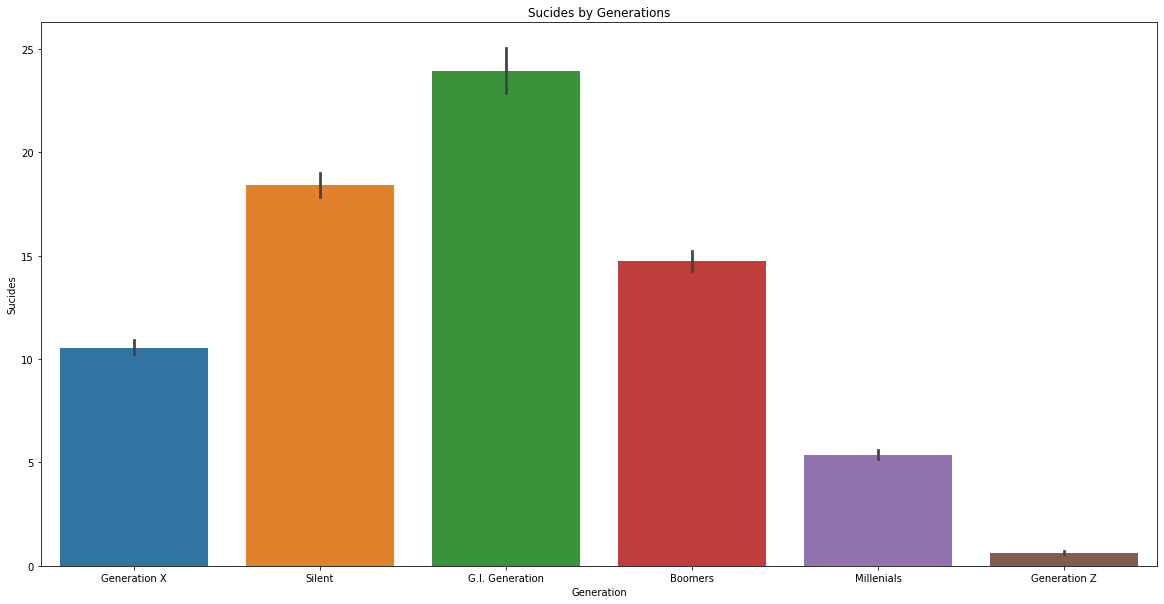

In [64]:
plt.figure(figsize = (20, 10))
sns.barplot(x = sucide_rates['generation'], y = sucide_rates['suicides/100k pop'])
plt.ylabel('Sucides')
plt.xlabel('Generation')
plt.title('Sucides by Generations')
plt.show()

In [66]:
sucide_rates[['age', 'suicides/100k pop']].groupby(['age']).mean().sort_values(by = 'age', ascending = False)

,suicides/100k pop
age,
75+ years,23.955409
55-74 years,16.155579
5-14 years,0.620041
35-54 years,14.947441
25-34 years,12.186885
15-24 years,8.947154
